In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('MLDATA.csv')
df.head()

,ID,Birth date,Birth place,Highschool graduation date,Highschool,Studies level,Degree,ESB entry date,Bac type,Current class,Semester 1 class,Degree level,Gender,Nationality,Class level,Previous class,Previous year result,Highschool graduation grade,Final score,Region
0,ID1,1996,Tunis,2020,Lycee Tunis,3.0,BA,2023,Bac Economie,2-BA-2,2-BA-2,2,M,TUNISIENNE,5,1-BA-2,Admis(e),10.61,-1.0,Tunis
1,ID2,2002,Tunis,2021,Lycee Ezzahra,3.0,MKD,2024,Bac Informatique,1-MKD-1,1-MKD-1,1,M,TUNISIENNE,4,External,Admis(e),12.91,-1.0,Ben Arous
2,ID3,2003,Tunis,2024,Lycee Asdrubal Bardo,0.0,LSG,2024,Bac Economie,1-LSG-1,1-LSG-1,1,M,TUNISIENNE,1,External,Admis(e),9.81,-1.0,Ariana
3,ID4,1999,Tunis,2021,Lycee Les Pères Blancs,3.0,MDSI,2021,Bac Economie,1-MDSI-1,1-MDSI-1,1,F,TUNISIENNE,4,3-LSG-4,Admis(e) - Bien,12.00,-1.0,Tunis
4,ID5,1999,Bizerte,2020,Lycee Bhira Bizerte,0.0,LSG,2023,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-8,Admis(e) - Passable,10.48,-1.0,Bizerte


In [2]:
df['Region'].unique()

array(['Tunis', 'Ben Arous', 'Ariana', 'Bizerte', 'Nabeul', 'Sousse',
       'Gabès', 'Foreign', 'Médenine', 'Sfax', 'Kébili', 'La Manouba',
       'Mahdia', 'Sidi Bouzid', 'Gafsa', 'Béja', 'Kairouan', 'Jendouba',
       'Siliana', 'Monastir', 'Le Kef', 'Kasserine', 'Zaghouan', 'Tozeur',
       'Tataouine'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2621 non-null   object 
 1   Birth date                   2621 non-null   int64  
 2   Birth place                  2621 non-null   object 
 3   Highschool graduation date   2621 non-null   int64  
 4   Highschool                   2621 non-null   object 
 5   Studies level                2621 non-null   float64
 6   Degree                       2621 non-null   object 
 7   ESB entry date               2621 non-null   int64  
 8   Bac type                     2621 non-null   object 
 9   Current class                2621 non-null   object 
 10  Semester 1 class             2621 non-null   object 
 11  Degree level                 2621 non-null   int64  
 12  Gender                       2621 non-null   object 
 13  Nationality       

In [4]:
df.describe()

,Birth date,Highschool graduation date,Studies level,ESB entry date,Degree level,Class level,Highschool graduation grade,Final score
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000
mean,2001.889355,2021.448684,0.943533,2022.770698,1.839756,2.688668,11.082472,-0.542774
std,2.555933,2.425087,1.370302,1.408967,0.839551,1.378122,1.850256,5.143817
min,1975.000000,1999.000000,0.000000,1999.000000,1.000000,1.000000,9.000000,-1.000000
25%,2001.000000,2021.000000,0.000000,2022.000000,1.000000,1.000000,10.110000,-1.000000
50%,2002.000000,2022.000000,0.000000,2023.000000,2.000000,3.000000,10.740000,-1.000000
75%,2004.000000,2023.000000,3.000000,2024.000000,2.000000,4.000000,11.710000,-1.000000
max,2007.000000,2024.000000,3.000000,2041.000000,4.000000,5.000000,76.350000,75.080000


In [5]:
df['Age'] = (2024 - df['Birth date'])


In [6]:
df = df.drop(columns=['ID', 'Highschool', 'Final score'])

In [7]:
grand_tunis_regions = ['Tunis', 'Ben Arous', 'Ariana', 'La Marsa', 'Carthage', 'Ezzahra', 'La Manouba']

# Create 'Region1' column based on condition
df['Grand Tunis'] = df['Region'].apply(lambda x: 1 if x in grand_tunis_regions else 0)

class_columns = ['Current class', 'Semester 1 class', 'Previous class']

df[class_columns] = df[class_columns].apply(lambda x: x.str[:-2])

df['Bac Scientifique'] = (
    df['Bac type']
    .replace({
        'Bac Sciences': 1,
        'Bac Math': 1,
        'Bac Technique': 1,
        'Bac Informatique': 1,
        'Bac Economie': 0,
        'Bac Français': 0,
        'Bac Lettres': 0,
        'Bac Général': 0,
        'Autre Bac': 0,

    })
      # Remettre la première lettre de chaque mot en majuscule
)

# Create a mapping dictionary with ordered values
result_mapping = {
    'Exclu(e)': 0,
    'Redouble': 1,
    'Admis(e) - Missing credits': 2,
    'Admis(e)' : 3,
    'Admis(e) - Passable': 2,
    'Admis(e) - Bien': 5
}

# Apply the mapping to the column
df['Previous year result'] = df['Previous year result'].map(result_mapping)

df['Tunisien(ne)'] = np.where(df['Nationality'] == 'TUNISIENNE', 1, 0)
df = df.drop(columns=['Region', 'Nationality'])

df['Gender'] = np.where(df['Gender'] == 'M', 1, 0)


C:\Users\malek\AppData\Local\Temp\ipykernel_31460\3852726811.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


In [8]:
df

,Birth date,Birth place,Highschool graduation date,Studies level,Degree,ESB entry date,Bac type,Current class,Semester 1 class,Degree level,Gender,Class level,Previous class,Previous year result,Highschool graduation grade,Age,Grand Tunis,Bac Scientifique,Tunisien(ne)
0,1996,Tunis,2020,3.0,BA,2023,Bac Economie,2-BA,2-BA,2,1,5,1-BA,3,10.61,28,1,0,1
1,2002,Tunis,2021,3.0,MKD,2024,Bac Informatique,1-MKD,1-MKD,1,1,4,Extern,3,12.91,22,1,1,1
2,2003,Tunis,2024,0.0,LSG,2024,Bac Economie,1-LSG,1-LSG,1,1,1,Extern,3,9.81,21,1,0,1
3,1999,Tunis,2021,3.0,MDSI,2021,Bac Economie,1-MDSI,1-MDSI,1,0,4,3-LSG,5,12.00,25,1,0,1
4,1999,Bizerte,2020,0.0,LSG,2023,Bac Economie,2-LSG,2-LSG,2,1,2,1-LSG,2,10.48,25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2000,Tunis,2022,0.0,LBC,2022,Bac Economie,3LBC-BIS,3LBC-BIS,3,1,3,2-LBC-BI,2,11.12,24,1,0,1
2617,2005,Le Kef,2023,0.0,LBC,2023,Bac Sciences,2-LBC,2-LBC,2,1,2,1-LBC,5,10.96,19,0,1,1
2618,2004,La Marsa,2023,0.0,LSG,2023,Bac Economie,2-LSG,2-LSG,2,1,2,1-LSG,2,10.18,20,1,0,1
2619,2004,Tunis,2022,0.0,LSG,2022,Bac Sciences,3-LSC,3-LSC,3,0,3,2-LSC,5,12.57,20,1,1,1


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Encode the specified columns
columns_to_encode = ['Birth place', 'Studies level', 'Degree level', 'Class level', 'Bac type', 'Degree', 'Current class', 'Semester 1 class', 'Previous class']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [11]:
df['Previous year result'].unique()

array([3, 5, 2, 0, 1], dtype=int64)

In [12]:
df

,Birth date,Birth place,Highschool graduation date,Studies level,Degree,ESB entry date,Bac type,Current class,Semester 1 class,Degree level,Gender,Class level,Previous class,Previous year result,Highschool graduation grade,Age,Grand Tunis,Bac Scientifique,Tunisien(ne)
0,1996,330,2020,3,0,2023,1,10,10,1,1,4,0,3,10.61,28,1,0,1
1,2002,330,2021,3,7,2024,3,8,8,0,1,3,23,3,12.91,22,1,1,1
2,2003,330,2024,0,5,2024,1,5,5,0,1,0,23,3,9.81,21,1,0,1
3,1999,330,2021,3,6,2021,1,7,7,0,0,3,21,5,12.00,25,1,0,1
4,1999,45,2020,0,5,2023,1,17,17,1,1,1,6,2,10.48,25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,2000,330,2022,0,3,2022,1,25,25,2,1,2,13,2,11.12,24,1,0,1
2617,2005,195,2023,0,3,2023,6,14,14,1,1,1,3,5,10.96,19,0,1,1
2618,2004,190,2023,0,5,2023,1,17,17,1,1,1,6,2,10.18,20,1,0,1
2619,2004,330,2022,0,5,2022,6,23,23,2,0,2,15,5,12.57,20,1,1,1


In [13]:
df['Gender'].unique()

array([1, 0])

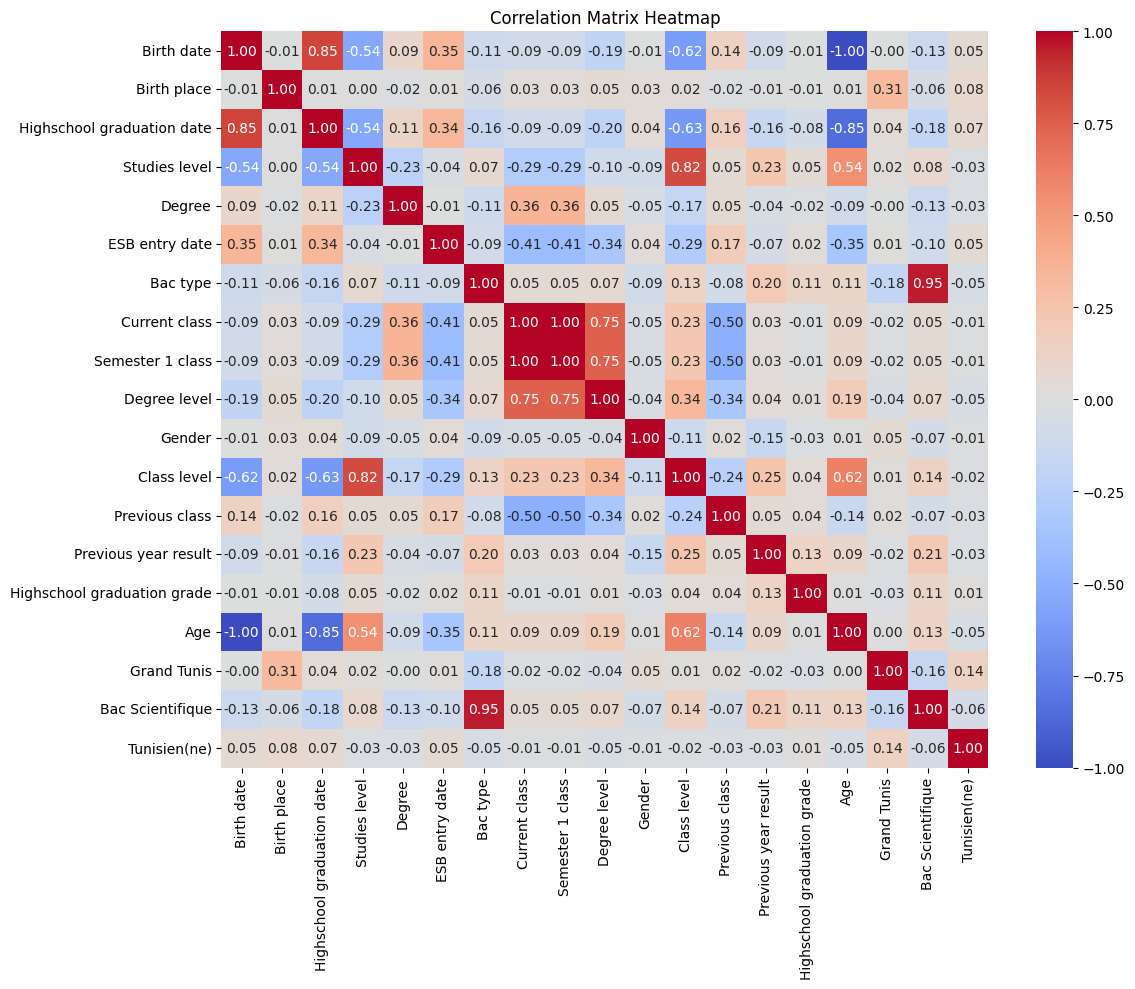


Highly correlated feature pairs (correlation > 0.8):
Birth date - Highschool graduation date: 0.85
Birth date - Age: -1.00
Highschool graduation date - Age: -0.85
Studies level - Class level: 0.82
Bac type - Bac Scientifique: 0.95
Current class - Semester 1 class: 1.00

Feature correlations with target variable:
Gender                         1.000000
Grand Tunis                    0.051189
Highschool graduation date     0.040147
ESB entry date                 0.035670
Birth place                    0.034739
Previous class                 0.020625
Age                            0.005147
Birth date                    -0.005147
Tunisien(ne)                  -0.010278
Highschool graduation grade   -0.026467
Degree level                  -0.043043
Semester 1 class              -0.045916
Current class                 -0.045916
Degree                        -0.047563
Bac Scientifique              -0.072449
Bac type                      -0.088695
Studies level                 -0.091796
Class

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated features (correlation > 0.8)
threshold = 0.8
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nHighly correlated feature pairs (correlation > 0.8):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")

# Feature selection using correlation with target (assuming 'Previous year result' is the target)
target_correlations = correlation_matrix['Gender'].sort_values(ascending=False)
print("\nFeature correlations with target variable:")
print(target_correlations)

Correlation = 1: Perfect positive correlation. 
Correlation = 0: No linear correlation. There is no linear relationship between the two features.
Correlation = -1: Perfect negative correlation. 

In [15]:
# Highly correlated pairs to handle:
# 1. Birth date & Age (correlation = -1.0) -> Drop 'Birth date' as Age is more intuitive
# 2. Current class & Semester 1 class (correlation = 1.0) -> Drop 'Semester 1 class' as it's identical
# 3. Bac type & Bac Scientifique (correlation = 0.954) -> Keep 'Bac Scientifique' as it's already binary
# 4. Studies level & Class level (correlation = 0.825) -> Drop 'Studies level' as Class level seems more specific
# 5. Birth date & Highschool graduation date (correlation = 0.850) -> Already dropping Birth date

columns_to_drop = ['Birth date', 'Semester 1 class', 'Bac type', 'Studies level', 'Previous class', 'Degree', 'Previous year result']
df = df.drop(columns=columns_to_drop)


In [16]:
df

,Birth place,Highschool graduation date,ESB entry date,Current class,Degree level,Gender,Class level,Highschool graduation grade,Age,Grand Tunis,Bac Scientifique,Tunisien(ne)
0,330,2020,2023,10,1,1,4,10.61,28,1,0,1
1,330,2021,2024,8,0,1,3,12.91,22,1,1,1
2,330,2024,2024,5,0,1,0,9.81,21,1,0,1
3,330,2021,2021,7,0,0,3,12.00,25,1,0,1
4,45,2020,2023,17,1,1,1,10.48,25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2616,330,2022,2022,25,2,1,2,11.12,24,1,0,1
2617,195,2023,2023,14,1,1,1,10.96,19,0,1,1
2618,190,2023,2023,17,1,1,1,10.18,20,1,0,1
2619,330,2022,2022,23,2,0,2,12.57,20,1,1,1


In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize (excluding binary columns and target variables)
numerical_columns = ['Birth place',  'Highschool graduation date', 'ESB entry date', 
                    'Highschool graduation grade', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Columns to standardize:", numerical_columns)

Columns to standardize: ['Birth place', 'Highschool graduation date', 'ESB entry date', 'Highschool graduation grade', 'Age']


In [18]:
df

,Birth place,Highschool graduation date,ESB entry date,Current class,Degree level,Gender,Class level,Highschool graduation grade,Age,Grand Tunis,Bac Scientifique,Tunisien(ne)
0,0.822868,-0.597488,0.162776,10,1,1,4,-0.255404,2.304630,1,0,1
1,0.822868,-0.185053,0.872651,8,0,1,3,0.987905,-0.043298,1,1,1
2,0.822868,1.052252,0.872651,5,0,1,0,-0.687859,-0.434619,1,0,1
3,0.822868,-0.185053,-1.256975,7,0,0,3,0.495987,1.130666,1,0,1
4,-1.793006,-0.597488,0.162776,17,1,1,1,-0.325678,1.130666,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0.822868,0.227382,-0.547100,25,2,1,2,0.020286,0.739345,1,0,1
2617,-0.416230,0.639817,0.162776,14,1,1,1,-0.066205,-1.217262,0,1,1
2618,-0.462123,0.639817,0.162776,17,1,1,1,-0.487848,-0.825940,1,0,1
2619,0.822868,0.227382,-0.547100,23,2,0,2,0.804111,-0.825940,1,1,1


In [19]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


X = df.drop('Current class', axis = 1).values
y = df['Current class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

reg = LazyRegressor()

# Fit the models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display results
print(models)



100%|██████████| 42/42 [00:09<00:00,  4.30it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 1965, number of used features: 11
[LightGBM] [Info] Start training from score 11.640712
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.91       0.91   2.33   
HistGradientBoostingRegressor                0.91       0.91   2.38   
LGBMRegressor                                0.91       0.91   2.39   
RandomForestRegressor                        0.90       0.90   2.48   
BaggingRegressor                             0.90       0.90   2.54   
XGBRegressor                                 0.89       0.90   2.56   
AdaBoostRegressor          

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': np.arange(50, 201, 25),  # Number of trees (values from 50 to 200 with a step of 50)
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees (discrete values)
    'min_samples_split': np.arange(2, 11, 2),  # Values from 2 to 10 with a step of 2
    'min_samples_leaf': np.arange(1, 5, 1),    # Values from 1 to 4 (discrete range)
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splits
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best hyperparameters found: ", grid_search.best_params_)

# Predict using the best model found
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-Squared

# Display performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r2:.2f}")

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Best hyperparameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
Root Mean Squared Error (RMSE): 2.36
R-Squared: 0.91


In [34]:
# Sample new input array (this is the array you provided)
new_input_array = np.array([0.822868,	1.052252,	0.872651,	0,	1,	0,	-0.687859,	-0.434619,	1,	0,	1]).reshape(1, -1)

# Predict the Current class using the trained model
y_pred = best_rf_model.predict(new_input_array)

# Output the prediction
print("Predicted Current class for the new data:", y_pred)


Predicted Current class for the new data: [4.03965108]


In [36]:
print("Mapping of Current class to encoded values: \n")
for original_class, encoded_value in target_mapping.items():
    print(f"{original_class} -> {encoded_value}") 

Mapping of Current class to encoded values: 

1-BA -> 0
1-FIND -> 1
1-GAMMA -> 2
1-LBC -> 3
1-LBC- -> 4
1-LSC -> 5
1-LSG -> 6
1-MCCA -> 7
1-MDSI -> 8
1-MKD -> 9
1DSI-AS1 -> 10
1DSI-AS2 -> 11
2-DSI-A3 -> 12
2-LBC-BI -> 13
2-LMAD -> 14
2-LSC -> 15
2-LSG -> 16
2-MKD -> 17
3-LBC-BI -> 18
3-LMAD -> 19
3-LSC -> 20
3-LSG -> 21
3LBC-BIS -> 22
Extern -> 23
